<a href="https://colab.research.google.com/github/JManuelRG/RDD/blob/main/M%C3%A9todos%20Num%C3%A9ricos/5%20Interpolacion_de_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El valor interpolado en x = 3 es aproximadamente 9.0000


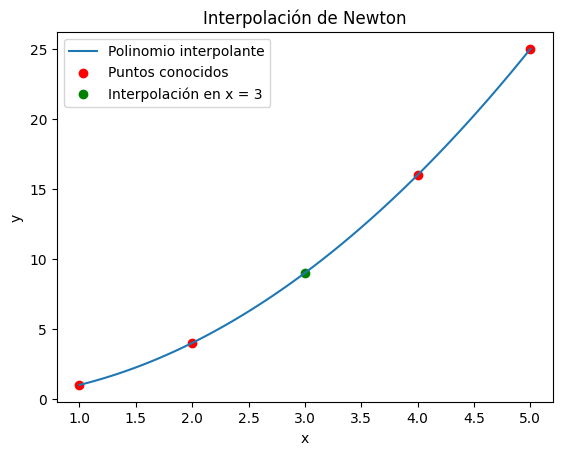

In [1]:
import numpy as np

# Definir la función para calcular las diferencias divididas de Newton
def diferencias_divididas(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # Primera columna son las 'y' originales

    # Calcular el resto de diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])

    return coef[0]  # Devuelve solo la primera fila (coeficientes del polinomio)

# Construir el polinomio de Newton usando las diferencias divididas
def polinomio_newton(x_data, y_data, x):
    coef = diferencias_divididas(x_data, y_data)
    n = len(coef)
    polinomio = coef[0]
    producto = 1.0

    for i in range(1, n):
        producto *= (x - x_data[i - 1])
        polinomio += coef[i] * producto

    return polinomio

# Datos de ejemplo
x_data = np.array([1, 2, 4, 5])   # Puntos x conocidos
y_data = np.array([1, 4, 16, 25]) # Valores y conocidos correspondientes

# Punto a interpolar
x_interpolar = 3

# Calcular la interpolación de Newton en el punto deseado
y_interpolado = polinomio_newton(x_data, y_data, x_interpolar)
print(f"El valor interpolado en x = {x_interpolar} es aproximadamente {y_interpolado:.4f}")

# Graficar el polinomio y los puntos conocidos (opcional)
import matplotlib.pyplot as plt

# Rango de puntos para graficar el polinomio
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range = [polinomio_newton(x_data, y_data, xi) for xi in x_range]

plt.plot(x_range, y_range, label="Polinomio interpolante")
plt.scatter(x_data, y_data, color="red", label="Puntos conocidos")
plt.scatter(x_interpolar, y_interpolado, color="green", label=f"Interpolación en x = {x_interpolar}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación de Newton")
plt.legend()
plt.show()
